## Final Project Submission

Please fill out:
* Student name: Jason Richards
* Student pace: part time
* Scheduled project review date/time: 03/07/2019 @ 3:00pm
* Instructor name: Joe San Pietro
* Blog post URL:https://jasonrichards911.wixsite.com/humble-py 


# Obtain the Data

The first step in the process is to obtain the data. Since the file is listed as a .csv file, pandas was selected as the method for import. Pandas allows us a fast download option with immediate visual confirmation. 

In [1]:
#importing data and obtaining tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#loading the file
df = pd.read_csv('kc_house_data.csv')
#checking the data to ensure load
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


As you can see, we can immediately check to see if the data was properly loaded into the DataFrame and provides us an initial look at the data. We also want to take a glimpse of the total size and types of data present in the database.

In [2]:
#initial glimpse of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Looks like there is going to be some scrubbing that will need to be performed. Also seems there is categorical information as well as some values that need a closer look. Let's take a look at the unique value range in 'condition' and 'grade'.

In [3]:
#checking the unique values in condition 
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [4]:
#checking unique values in grade
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

## Data Research

Before moving onto our scrubbing phase, there were some initial notes that required further research to better understand the data involved in the project. Here is a list of initial notes on the data:

1. Bathrooms are noted in floats - what is .25 of a restroom?
2. View represents if the house was viewed.
3. Is sqftliving15 and sqftlot15 averaged (nearest 15 neighbors)?
4. Having latitude and longitude data will alow us to map (good for visuals).
5. Need to look into the 'grade' and 'condition'columns a little further - how is the scale determined and how is the grading score calculated?

**Regarding a .25 bathroom, after web search (not much data available) it looks like a quarter bathroom is just a sink.

**Regarding building condition - Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

Found from: https://info.kingcounty.gov/assessor/esales/glossary.aspx?type=r

**Regarding building grade - Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

Found from: https://info.kingcounty.gov/assessor/esales/glossary.aspx?type=r

# Data Scrub

Now that we have a better insight into the actual data, its time to clean up the data and get it ready for exploration. Based on df.info() above, we are going to first handle those values that are objects.

### date

The date is set as a mm/dd/yyyy format and the '/' have saved these values as objects. 

In [5]:
#convert date feature to a datetime object
pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


### sqft_basement

This object needs converted to a numerical format and discovered there is a value '?' that we need to handle before converting this column. We are also going to convert this feature into a simpler catagorical feature as a boolean value as 0 for False and 1 for True and rename the feature 'is_bsmnt'.

In [6]:
df.sqft_basement.unique().max()

'?'

In [7]:
#get rid of rows with '?'
df=df[df.sqft_basement != '?']
df.sqft_basement=df.sqft_basement.astype(float, inplace=True)
df.sqft_basement=df.sqft_basement.astype(np.int64, inplace=True)

In [8]:
#convert any value above zero into a one and change column name to is_bsmnt
for x in df.sqft_basement:
    if x > 0:
        df.sqft_basement.replace(to_replace=x,value=1, inplace=True)

df = df.rename(columns={'sqft_basement': 'is_bsmnt'})

### zipcode

Zipcodes are categorical, but I do want to include them. I do want to condense the dataset, keep integrity and reference a more relevant location element than zipcode. A zip_codes xlsx doc was created and includes the cities of the relevant zipcodes in the dataset. The two dataframes will be merged on the zipcode column.

In [9]:
dfz = pd.read_excel('zip_codes.xlsx')

In [10]:
df = pd.merge(df,df1,how='left',on=['zipcode'])

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,is_bsmnt,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,city
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,Kenmore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1,1965,0.0,98136,47.5208,-122.393,1360,5000,12,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,Sammamish


### price, floors, bathrooms

These just needs to be converted from a float to an integer

In [12]:
df.price = df.price.astype(np.int64, inplace=True)
df.floors = df.floors.astype(np.int64, inplace=True)
df.bathrooms = df.bathrooms.astype(np.int64, inplace=True)

### Removable data

The features of id, long and lat will be removed from the dataset. It is believed that the longitude and latitude of the homes will be of use for investor visualization, but the zipcode should suffice for location data. The id created by the county will have no relevance to price. Waterfront is basically True/False value set as integers. The True or 1 values are so few (less than 5% of total observations), it is safe to just eliminate this feature. Zipcodes will also be dropped since we have the city data.

In [13]:
#drop the columns inplace
df.drop('id', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('waterfront', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)

### Null Values

View and yr_renovated columns all contain null values. We are going to take care of these so that we have full data columns. While we are fixing the null values, each column will be handled individually to determine what to do with the valid data.

In [14]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
df.yr_renovated.value_counts()

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
2010.0       14
1985.0       14
1986.0       14
1987.0       14
1991.0       14
1992.0       13
1994.0       13
2001.0       12
1997.0       12
1995.0       12
1996.0       11
          ...  
1968.0        6
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1981.0        4
1969.0        4
1978.0        3
1963.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1972.0        3
1945.0        2
1962.0        2
1967.0        2
1974.0        2
1957.0        2
1940.0        2
1951.0        1
1948.0        1
1950.0        1
1976.0        1
1954.0        1
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Leng

View is the rating of the view from the property. Again, there are so few values that eliminating the rows with the null values will not greatly effect the dataset. Yr_renovated only has less than 800 observable elements. We will just remove this feature completely.

In [17]:
#remove yr_renovated
df.drop('yr_renovated', axis=1, inplace=True)

In [18]:
#this prop will take care of the view null values
df=df.dropna()

In [19]:
#convert view to integer
df.view=df.view.astype(np.int64)

Lets have a look at our dataframe now and see if our data looks good.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21142
Data columns (total 16 columns):
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null int64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null int64
view             21082 non-null int64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
is_bsmnt         21082 non-null int64
yr_built         21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
city             21082 non-null object
dtypes: int64(15), object(1)
memory usage: 2.7+ MB


Final scrub is to find any duplicated rows and remove.

In [21]:
#find duplicates and adds up all True values
df.duplicated(keep=False).sum()

4

What??? Four duplicates? We will get rid of those rows as well.

In [22]:
df=df.drop_duplicates()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 0 to 21142
Data columns (total 16 columns):
price            21080 non-null int64
bedrooms         21080 non-null int64
bathrooms        21080 non-null int64
sqft_living      21080 non-null int64
sqft_lot         21080 non-null int64
floors           21080 non-null int64
view             21080 non-null int64
condition        21080 non-null int64
grade            21080 non-null int64
sqft_above       21080 non-null int64
is_bsmnt         21080 non-null int64
yr_built         21080 non-null int64
sqft_living15    21080 non-null int64
sqft_lot15       21080 non-null int64
month            21080 non-null int64
city             21080 non-null object
dtypes: int64(15), object(1)
memory usage: 2.7+ MB


# Exploring the Data

We are going to take a look at a correlation heatmap to detect early signs of multicollinearity between features.

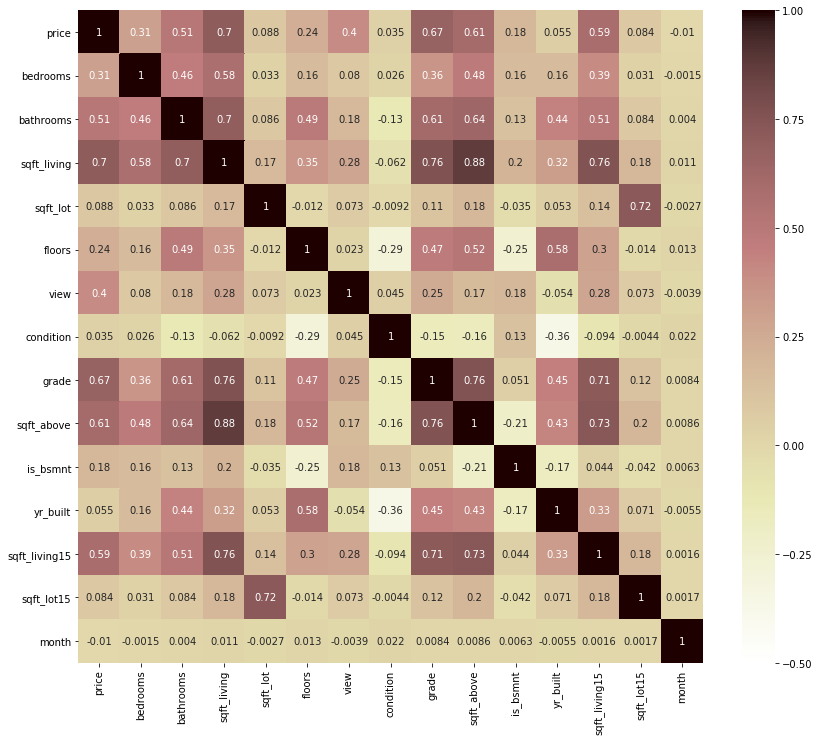

In [24]:
#awesome heatmap code with individual annotation for a multicollinearity map
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

Sqft_living and sqft_above are very highly correlated, due to that and that we have the living area of the 15 nearest neighbors, we will remove sqft_living from the dataset

In [25]:
df.drop('sqft_living', axis=1, inplace=True)

Now we will run a quick look at the basic statistical information

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month
count,2.108000e+04,21080.000000,21080.000000,2.108000e+04,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,5.402607e+05,3.372486,1.750332,1.507894e+04,1.445636,0.233349,3.409867,7.657590,1789.068691,0.392932,1971.019545,1986.983539,12733.613994,6.576471
std,3.667446e+05,0.924988,0.733371,4.117510e+04,0.551262,0.765099,0.650615,1.173673,828.371814,0.488413,29.321911,685.539809,27149.834582,3.114166
min,7.800000e+04,1.000000,0.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.000000,7.620000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7626.000000,6.000000
75%,6.450000e+05,4.000000,2.000000,1.069875e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1.000000,1997.000000,2360.000000,10089.000000,9.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,6210.000000,871200.000000,12.000000


Looks like there may be some outliers based on the information here, but let's use a scatter matrix to verify.

Now we will take an indepth look at the leftover data. A great visualization tool for this is the scatter matrix. This will show us distribution of the features via histograms as well as the distribution to each point via scatter plots. Many observations can be made from this plot.

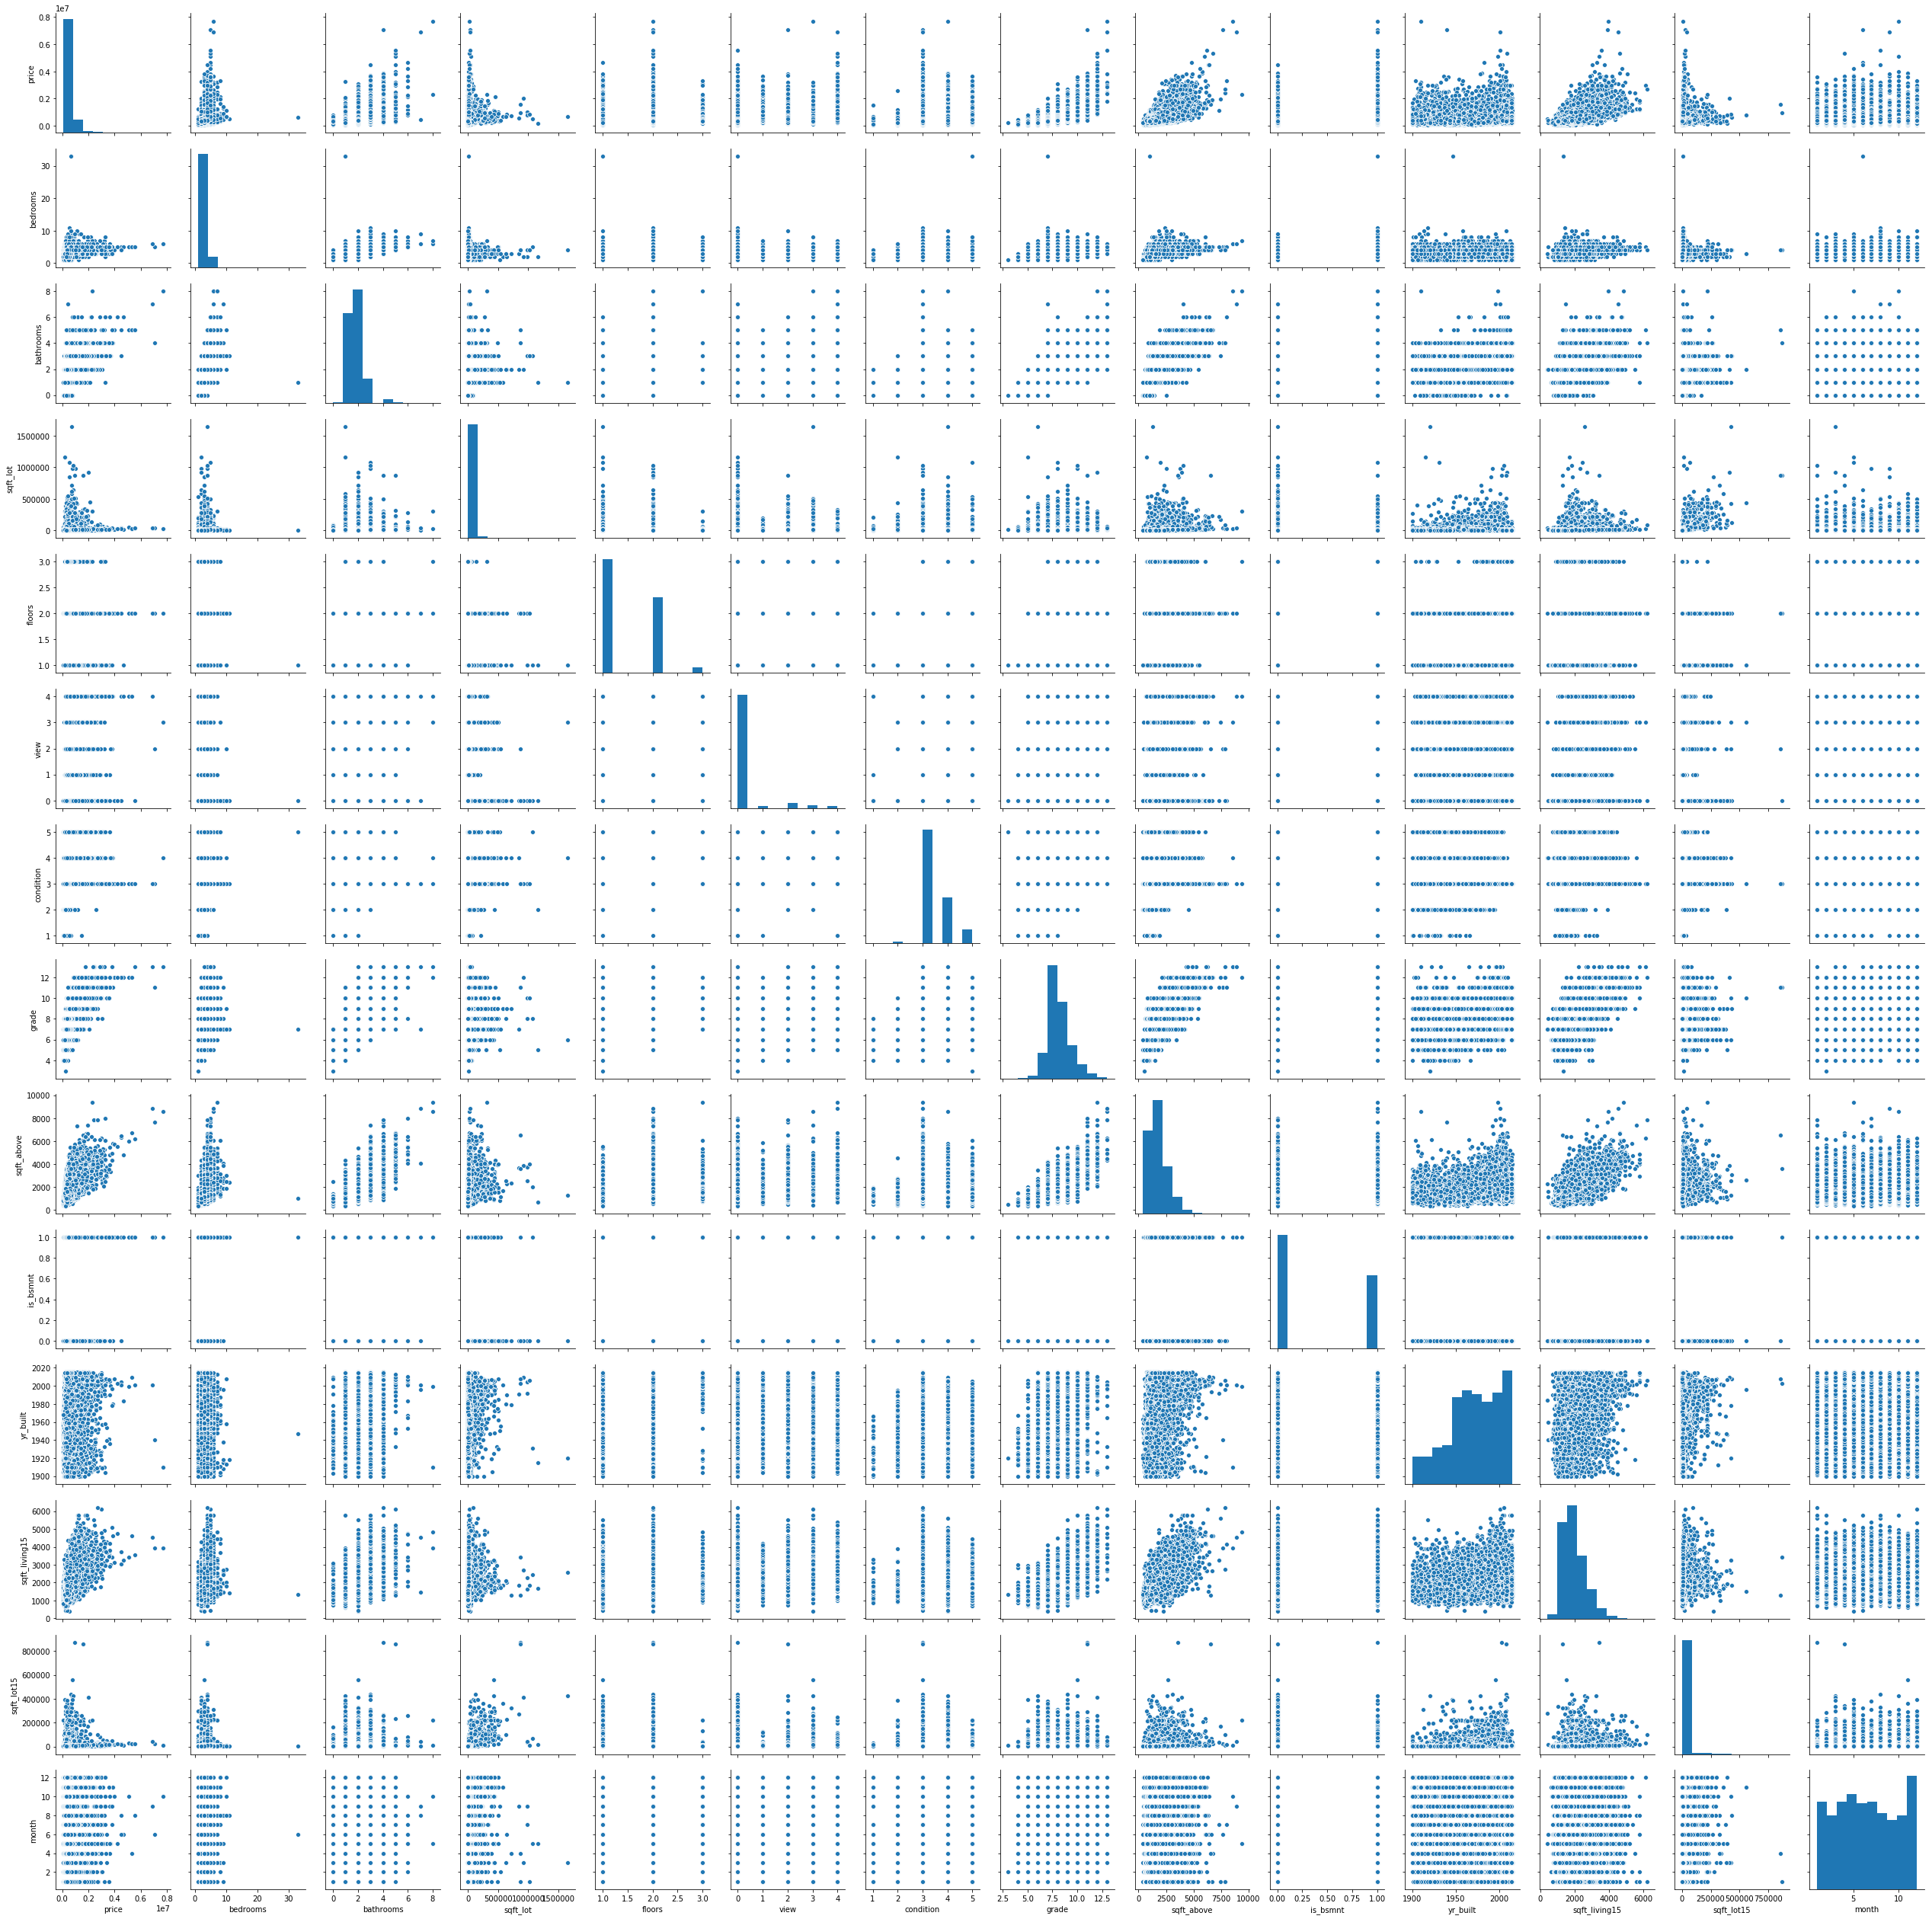

In [27]:
#creates a scatter matrix visualization between all features
sns.pairplot(df);

Observations from scatter matrix visualization:

*Several features show categorical trend (view,grade,condition,floors,bathrooms,bedrooms,month,yr_renovated)
*The categorical columns also show homoscedasticity
*Non-categorical trending columns do show forms of heteroscedasticity
* Vaidates some outliers are present in the data.

### Remove Outliers

We will track down some obvious outliers based on cross referencing the statistical sheet and the graphical visulaization. First I am going to reindex the data.

In [28]:
df.reindex(axis=0)
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
0,221900,3,1,5650,1,0,3,7,1180,0,1955,1340,5650,10,Seattle
1,538000,3,2,7242,2,0,3,7,2170,1,1951,1690,7639,12,Seattle
2,180000,2,1,10000,1,0,3,6,770,0,1933,2720,8062,2,Kenmore
3,604000,4,3,5000,1,0,5,7,1050,1,1965,1360,5000,12,Seattle
4,510000,3,2,8080,1,0,3,8,1680,0,1987,1800,7503,2,Sammamish


In [29]:
df.loc[df['bedrooms']>15]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
15518,640000,33,1,6000,1,0,5,7,1040,1,1947,1330,4700,6,Seattle


In [30]:
df.loc[df['sqft_lot15']>500000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
9509,937500,4,4,871200,2,0,3,11,3605,1,2003,3420,871200,1,Carnation
13177,790000,3,2,432036,1,3,3,10,2640,0,1996,1500,560617,11,Enumclaw
20010,1600000,4,5,871200,2,2,3,11,6530,0,2008,1280,858132,4,Carnation


In [31]:
df.loc[df['price']>6000000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
3846,7060000,5,4,37325,2,2,3,11,7680,1,1940,3930,25449,6,Bellevue
7105,7700000,6,8,27600,2,3,4,13,8570,1,1910,3940,8800,10,Seattle
9059,6890000,6,7,31374,2,4,3,13,8860,1,2001,4540,42730,9,Medina


In [32]:
df.loc[df['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
1687,700000,4,1,1651359,1,3,4,6,1300,0,1920,2560,425581,3,Enumclaw
7489,542500,5,3,1074218,1,0,5,8,2010,1,1931,2450,68825,5,Issaquah
7610,855000,4,3,1024068,2,0,3,10,4030,0,2006,1830,11700,1,North_Bend
16940,190000,2,1,1164794,1,0,2,5,710,0,1915,1680,16730,5,Carnation


In [33]:
df.drop(index=[15518,9509,13177,20010,3846,7105,9059,1687,7489,7610,16940], inplace=True)

In [34]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21069 entries, 0 to 21142
Data columns (total 15 columns):
price            21069 non-null int64
bedrooms         21069 non-null int64
bathrooms        21069 non-null int64
sqft_lot         21069 non-null int64
floors           21069 non-null int64
view             21069 non-null int64
condition        21069 non-null int64
grade            21069 non-null int64
sqft_above       21069 non-null int64
is_bsmnt         21069 non-null int64
yr_built         21069 non-null int64
sqft_living15    21069 non-null int64
sqft_lot15       21069 non-null int64
month            21069 non-null int64
city             21069 non-null object
dtypes: int64(14), object(1)
memory usage: 2.6+ MB


## Categorize Data

The features considered very categorical in element values and visualization will be categorized and binned using OHE. There also was an issue with the numerical data in sqft_basement. Rather than eliminate it, I categorized and binned it.

In [36]:
#categorize features
df.view=df.view.astype('category', inplace = True)
df.grade=df.grade.astype('category', inplace=True)
df.condition=df.condition.astype('category', inplace=True)
df.floors=df.floors.astype('category', inplace=True)
df.is_bsmnt=df.is_bsmnt.astype('category', inplace=True)
df.bathrooms=df.bathrooms.astype('category', inplace=True)
df.bedrooms=df.bedrooms.astype('category', inplace=True)
df.month=df.bedrooms.astype('category', inplace=True)

In [37]:
#one hot encode categorized features and save as its own df
df=pd.get_dummies(df)

In [38]:
#check data to ensure changes were made
df.head()

,price,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,221900,5650,1180,1955,1340,5650,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,538000,7242,2170,1951,1690,7639,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,180000,10000,770,1933,2720,8062,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,5000,1050,1965,1360,5000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,510000,8080,1680,1987,1800,7503,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Before moving into actual normalizing and modeling, it would be a good idea to save the dataframe as its own. It will be saved as 'df_clean.csv'

In [39]:
df.to_csv('df_clean.csv', index=False)

## Scale Continuous Data

We are going to scale all of the continuous data and visualize each feature as a KDE with Histogram to check distribution

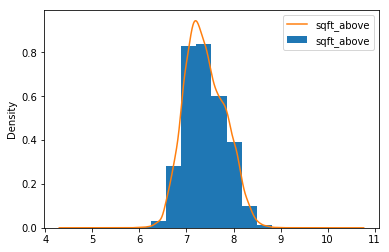

In [40]:
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_above'].plot.hist(density=True )
df['sqft_above'].plot.kde(label='sqft_above')
plt.legend()
plt.show()

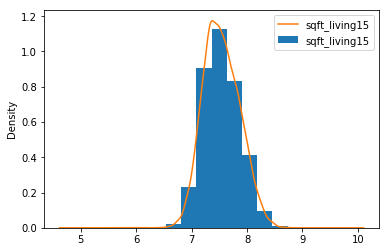

In [41]:
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_living15'].plot.hist(density=True )
df['sqft_living15'].plot.kde(label='sqft_living15')
plt.legend()
plt.show()

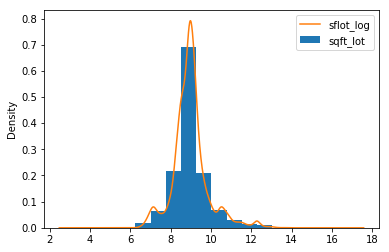

In [42]:
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_lot'].plot.hist(density=True )
df['sqft_lot'].plot.kde(label='sflot_log')
plt.legend()
plt.show()

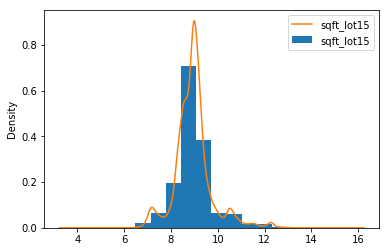

In [43]:
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['sqft_lot15'].plot.hist(density=True )
df['sqft_lot15'].plot.kde(label='sqft_lot15')
plt.legend()
plt.show()

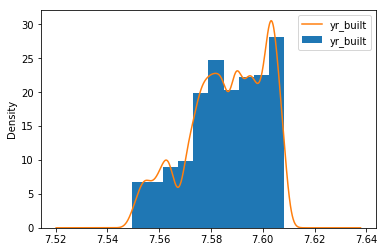

In [44]:
df['yr_built'] = np.log(df['yr_built'])
df['yr_built'].plot.hist(density=True )
df['yr_built'].plot.kde(label='yr_built')
plt.legend()
plt.show()

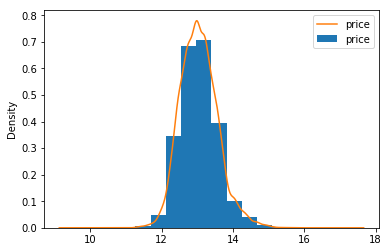

In [45]:
df['price'] = np.log(df['price'])
df['price'].plot.hist(density=True )
df['price'].plot.kde(label='price')
plt.legend()
plt.show()

Although some features have multiple peaks and all features tend towards a leptokurtic shape, the data selected does have a normal trend.

## Questions to ask

1. What are the top three features that attribute to price?

2. Is there any findings on location of home that is valuable to an investor?

3. Is there any findings on time of year that is valuable to an investor?

## Fit a Model

This first model (ordinary least squares) fit will provide us the individual features results against the target 'price'.

In [46]:
#import statsmodels to build linear regression models
import statsmodels.formula.api as smf
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.018717292569577326, 12.327438629437271, 0.08012608912503316, 1.467474782967409e-88]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.34160007807448856, 7.722507830173501, 0.7200982410932293, 0.0]
Housing: Price~yr_built
------------------------------
['yr_built', 0.006407900477009343, -8.323192226641424, 2.8170758114394943, 2.6636014243163928e-31]
Housing: Price~sqft_living15
------------------------------
['sqft_living15', 0.3691093688004905, 5.695290689004868, 0.9751772727486889, 0.0]
Housing: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.014996150711792167, 12.334695269617946, 0.07957218767299257, 3.3822935647641062e-71]
Housing: Price~bedrooms_1
------------------------------
['bedrooms_1', 0.007645999494529598, 13.052095181914257, -0.4846622570934367, 4.826959195931904e-37]
Housing: Price~bedrooms_2
------------------------------
['bedrooms_2', 0.03216705867485914, 13.

['month_4', 0.05108108160557179, 12.966447801574919, 0.2547521079262773, 3.3759858837356395e-242]
Housing: Price~month_5
------------------------------
['month_5', 0.033427052116441924, 13.020607155859054, 0.3675793495507401, 8.841576765777449e-158]
Housing: Price~month_6
------------------------------
['month_6', 0.005440600184354549, 13.043387043524113, 0.35233052960171274, 8.16350466382843e-27]
Housing: Price~month_7
------------------------------
['month_7', 0.0015949381342246216, 13.046833515443076, 0.5079877715664417, 6.677375315162986e-09]
Housing: Price~month_8
------------------------------
['month_8', 0.0008226214802933285, 13.047327110710949, 0.6067693136640366, 3.130508306731796e-05]
Housing: Price~month_9
------------------------------
['month_9', 0.0003424299768554073, 13.047537425331416, 0.5761470565012274, 0.0072295343935031555]
Housing: Price~month_10
------------------------------
['month_10', 0.00014620712240442924, 13.047625695499395, 0.5323727232385345, 0.079246027

First, we will run a model with all of the continuous data

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~sqft_above+sqft_living15+yr_built+sqft_lot15+sqft_lot'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     3972.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:29:47   Log-Likelihood:                -9336.8
No. Observations:               21069   AIC:                         1.869e+04
Df Residuals:                   21063   BIC:                         1.873e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        75.6177      1.485     50.909      0.000      72.706      78.529
sqft_above        0.5409      0.009     58.050      0.000       0.523       0.559
sqft_living15     0.7200      0.012     61.682      0.000       0.697       0.743
yr_built         -9.3607      0.199    -47.100      0.000      -9.750      -8.971
sqft_lot15       -0.0695      0.008     -8.453      0.000      -0.086      -0.053
sqft_lot         -0.0404      0.007     -5.422      0.000      -0.055      -0.026
==============================================================================
Omnibus:                       62.062   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.786
Skew:                           0.078   Prob(JB):                     2.58e-16
Kurtosis:                       3.240   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The above shows us that the combination of data results in all data being statistically significant (p<.05) and attribute to about 48% of price predictability (R2 value).

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~sqft_above+sqft_living15+yr_built+sqft_lot15+sqft_lot \
+bedrooms_1+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5 \
+bathrooms_2+bathrooms_4+bathrooms_5 \
+floors_1+floors_2+floors_3+view_0+view_1+view_2+view_3+view_4 \
+grade_4+grade_5+grade_6+grade_10+grade_11+grade_12+grade_13 \
+condition_1+condition_2+condition_4+condition_5+is_bsmnt_0+is_bsmnt_1 \
+city_Auburn+city_Enumclaw+city_Enumclaw+city_Federal_Way+city_Kent+city_Kirkland+city_Maple_Valley \
+city_Medina+city_Mercer_Island+city_Redmond+city_Renton+city_Woodinville'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1490.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -1793.1
No. Observations:               21069   AIC:                             3672.
Df Residuals:                   21026   BIC:                             4014.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.3685      0.657     35.546      0.000      22.080      24.657
sqft_above             0.5338      0.009     56.943      0.000       0.515       0.552
sqft_living15          0.3462      0.009     37.996      0.000       0.328       0.364
yr_built              -5.3336      0.177    -30.159      0.000      -5.680      -4.987
sqft_lot15            -0.0564      0.006     -9.688      0.000      -0.068      -0.045
sqft_lot               0.0163      0.005      3.056      0.002       0.006       0.027
bedrooms_1             0.1849      0.026      7.131      0.000       0.134       0.236
bedrooms_2             0.1368      0.017      8.090      0.000       0.104       0.170
bedrooms_3             0.0649      0.016      4.109      0.000       0.034       0.096
bedrooms_4             0.0584      0.016      3.733      0.000       0.028       0.089
bedrooms_5             0.0434      0.016      2.631      0.009       0.011       0.076
bathrooms_2            0.0086      0.004      2.015      0.044       0.000       0.017
bathrooms_4            0.0720      0.016      4.471      0.000       0.040       0.104
bathrooms_5            0.1020      0.042      2.439      0.015       0.020       0.184
floors_1               7.7048      0.217     35.471      0.000       7.279       8.131
floors_2               7.7546      0.219     35.379      0.000       7.325       8.184
floors_3               7.9092      0.221     35.744      0.000       7.475       8.343
view_0                 4.5219      0.132     34.253      0.000       4.263       4.781
view_1                 4.6276      0.132     35.023      0.000       4.369       4.887
view_2                 4.6183      0.132     35.093      0.000       4.360       4.876
view_3                 4.6838      0.132     35.536      0.000       4.425       4.942
view_4                 4.9169      0.132     37.273      0.000       4.658       5.175
grade_4               -0.2781      0.052     -5.342      0.000      -0.380      -0.176
grade_5               -0.2574      0.018    -13.981      0.000      -0.293      -0.221
grade_6               -0.1872      0.007    -25.910      0.000      -0.201      -0.173
grade_10               0.2326      0.009     25.232      0.000       0.215       0.251
grade_11               0.3346      0.015     22.059      0.000       0.305       0.364
grade_12               0.4764      0.030     15.964      0.000       0.418       0.535
grade_13               0.6879      0.082      8.437      0.000       0.528       0.848
condition_1           -0.2455      0.050     -4.868      0.000      -0.344      -0.147
condition_2           -0.1689      0.021     -8.074      0.000      -0.210      -0.128
condition_4            0.0610      0.005     13.279      0.000       0.052       0.070
condition_5            0.1448      0.0

There were a few adds and removals before reaching this model. It has a near 75% predictability and all p-values are statistically significant. This is the best model results I could get. It does have a slight kurtosis skew (above 3.0) and there is a multicollinearity warning. We will run a test,train validation below.

## Testing Fit Through Recursive Feature Elimination

In [49]:
df1=df.drop('price', axis=1)

In [50]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
predictors=df1
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(predictors, df.price)

In [51]:
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [52]:
selector.ranking_

array([84, 81, 80, 82, 83, 16, 22, 11, 25, 13, 55, 37, 24, 53, 28, 51,  2,
        3,  5,  6,  7,  8,  9,  4, 10,  1,  1,  1, 35, 33, 34, 32, 31, 18,
       17, 19, 20, 21, 46, 48, 47, 45, 44, 43, 42, 41, 40, 39, 38, 49, 50,
       15, 23, 12, 36, 14, 26, 29, 54, 27, 52, 30, 78, 58, 73, 68, 70, 71,
       76, 61, 79, 65, 69, 77, 60, 75, 56, 57, 72, 59, 74, 63, 62, 66, 67,
       64])

In [53]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.19667876  0.13417051  0.06250825]
13.108402827691174


According to the recursive feature elimination test, the categorized floor features were the best fit.

## Model Validation through Train, Test, Split

This test will determine the validity of our selected model with our selected three features.

In [65]:
#set data 
y = df[["price"]]
X = df[['sqft_above','sqft_living15','yr_built','sqft_lot15','sqft_lot', \
'bedrooms_1','bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5', \
'bathrooms_2','bathrooms_4','bathrooms_5', \
'floors_1','floors_2','floors_3','view_0','view_1','view_2','view_3','view_4', \
'grade_4','grade_5','grade_6','grade_10','grade_11','grade_12','grade_13', \
'condition_1','condition_2','condition_4','condition_5','is_bsmnt_0','is_bsmnt_1', \
'city_Auburn','city_Enumclaw','city_Enumclaw','city_Federal_Way','city_Kent','city_Kirkland','city_Maple_Valley', \
'city_Medina','city_Mercer_Island','city_Redmond','city_Renton','city_Woodinville']]
#import tools and load test-train-split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16855 4214 16855 4214


In [66]:
#perform regression on train and tests sets
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [67]:
#residuals are also trained and tested
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [68]:
#mean squared error test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.06887
dtype: float64
Test Mean Squarred Error: price    0.071809
dtype: float64


There is not a significant change in the tested and trained mean squared error values which further validates our findings.

To gather information on location and time of year, we will pull value counts on those features to find a maximum and minimum range of home sales.

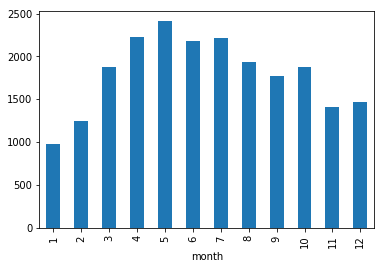

In [58]:
#visualization for presentation
import pandas as pd
df_raw = pd.read_csv('kc_house_data.csv')
df_raw['month'] = pd.DatetimeIndex(df_raw['date']).month
df_raw[['month','id']].groupby('month').count().plot(kind='bar', legend=False);

This visual will let our investor have a better idea of peak selling months to time out flips.

(0, 2000)

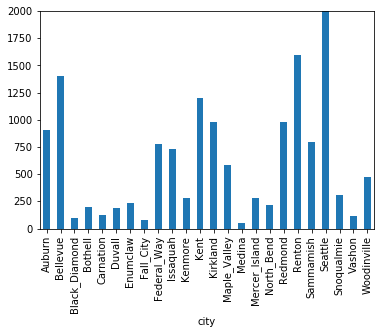

In [76]:
df_raw = pd.read_csv('kc_house_data.csv')
dfz = pd.read_excel('zip_codes.xlsx')
dfc = pd.merge(df_raw,dfz,how='left',on=['zipcode'])
dfc[['city','id']].groupby('city').count().plot(kind='bar', legend=False);
plt.ylim(0,2000)

This visual provides us with some interesting insights on popular real estate locations outside of Seattle where investing may be of value.